Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

Read data

In [2]:
wine_quality = pd.read_csv('data/winequality-red.csv')
len(wine_quality)

1599

In [3]:
wine_quality.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Checking data types

In [4]:
wine_quality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Checking for NaN values

In [5]:
wine_quality.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Checking correlations between different variables and the quality of the wine

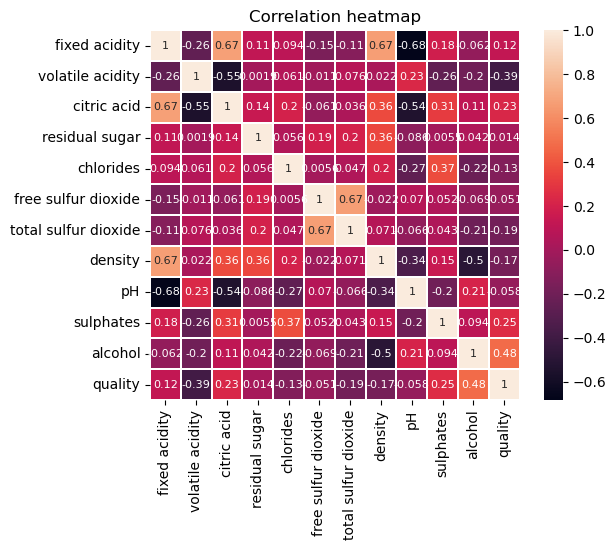

In [6]:
qual_corr = wine_quality.corr()
sns.heatmap(qual_corr, linewidths = 0.1, vmax = 1, square = True, annot = True, annot_kws={"size":8})
plt.title('Correlation heatmap')
plt.show()

From the heat map above, the highest linear correlation between quality and any other variable is quality and alcohol.

scatter plot with line of best fit for quality of alcohol and alcohol

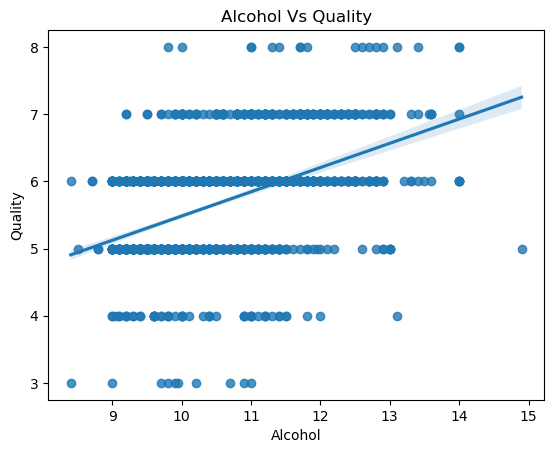

In [7]:
sns.regplot(x = 'alcohol', y = 'quality', data = wine_quality)
plt.title('Alcohol Vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

Splitting response variable and explanatory variable

In [8]:
y = wine_quality[['quality']]

y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [9]:
X = wine_quality.loc[:, ~wine_quality.columns.isin(['quality'])]


X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

Creating and fitting the model (decision tree classifier)

In [11]:
DTC = DecisionTreeClassifier()
DTC = DecisionTreeRegressor()
DTC.fit(X_train, y_train)

DecisionTreeRegressor()

Creating training prediction data

In [12]:
prediction_training = DTC.predict(X_train)

Calculating different metrics of accuracy with training data

In [13]:
conf_matrix = confusion_matrix(y_train, prediction_training)
print(conf_matrix)

[[  8   0   0   0   0   0]
 [  0  45   0   0   0   0]
 [  0   0 548   0   0   0]
 [  0   0   0 506   0   0]
 [  0   0   0   0 159   0]
 [  0   0   0   0   0  13]]


In [14]:
accuracy = accuracy_score(y_train, prediction_training)
score = f1_score(y_train, prediction_training, average = 'weighted')
recall = recall_score(y_train, prediction_training, average = 'weighted')
precision = precision_score(y_train, prediction_training, average = 'weighted')

print('Accuracy:', accuracy)
print('f1 score:', score)
print('recall score:', recall)
print('precision score:', precision)

Accuracy: 1.0
f1 score: 1.0
recall score: 1.0
precision score: 1.0


Test Predictions

In [15]:
prediction_test = DTC.predict(X_test)

Different metrics of accuracy of predicted test data

In [16]:
conf_matrix = confusion_matrix(y_test, prediction_test)
print(conf_matrix)

[[ 0  2  0  0  0  0]
 [ 1  3  2  1  1  0]
 [ 0 10 85 34  4  0]
 [ 0  3 30 82 15  2]
 [ 0  1  4 15 19  1]
 [ 0  0  0  3  1  1]]


In [17]:
test_accuracy = accuracy_score(y_test, prediction_test)
test_f1_score = f1_score(y_test, prediction_test, average = 'weighted')
test_recall_score = recall_score(y_test, prediction_test, average = 'weighted')
test_precision_score = precision_score(y_test, prediction_test, average = 'weighted')

print('Accuracy:', test_accuracy)
print('f1 score:', test_f1_score)
print('recall score:', test_recall_score)
print('precision score:', test_precision_score)

Accuracy: 0.59375
f1 score: 0.5999477768930569
recall score: 0.59375
precision score: 0.6097521491832196


Decision Tree Regression Model with a 60% accuracy to predict alcohol quality

Try different decision tree classification models (XGBoost, Random forest) as well as KNN and SVM as it is more effective in high dimensional space compared to KNN

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=31)
rf_model = RandomForestClassifier(random_state=31)
svm_model = SVC(random_state=31)
knn_model = KNeighborsClassifier()

# fit models
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Calculate accuracies with ±1 tolerance
xgb_accuracy = accuracy_score(y_test, xgb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")

/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost Accuracy: 0.6781
Random Forest Accuracy: 0.6750
SVM Accuracy: 0.4969
KNN Accuracy: 0.4719


/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# for xgb the target variable quality must start at 0 so we can shift the quality by 3
y_xgb = y - 3
X_train, X_test, y_train, y_test = train_test_split(X, y_xgb, test_size = 0.2, random_state = 55)
# Define parameter grid for XGBoost
param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 300],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)))

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
# Train the model
grid_search.fit(X_train, y_train)
# Make predictions
best_xgb_model = grid_search.best_estimator_
xgb_pred = best_xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("\nXGBoost Test Accuracy:", xgb_accuracy)


XGBoost Test Accuracy: 0.6875


Define an accuracy function that considers a prediction accurate if within 1 magnitude of quality to see how big the variance of predictions are given by model

In [38]:
def wine_quality_accuracy_error_margin(y_true, y_pred, error_margin):
    # Count predictions that are within ±1 of the true value
    correct_predictions = np.sum(np.abs(y_true - y_pred) <= error_margin)
    return correct_predictions / len(y_true)
wine_quality_accuracy_error_margin(y_test['quality'], xgb_pred, 1)

0.9625

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Param grid for random forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=31)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,  # 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1,
)

# Fit the model with cross validation
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best cross-validation score:", rf_grid_search.best_score_)

# Use the best model for predictions
best_rf_model = rf_grid_search.best_estimator_
rf_pred = best_rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", rf_accuracy)

# Calculate accuracy within ±1 tolerance
rf_accuracy_1 = wine_quality_accuracy_error_margin(y_test['quality'], rf_pred, 1)
print("Accuracy within ±1:", rf_accuracy_1)


/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

Best cross-validation score: 0.6919332107843138
Accuracy: 0.678125
Accuracy within ±1: 0.9625


In [57]:
from sklearn.svm import SVC
# Define parameter grid for SVM
svm_param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale'],
    'kernel': ['rbf', 'poly'],
}

# Initialize SVM classifier
svm_model = SVC(random_state=42)

# Initialize GridSearchCV 
svm_grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_param_grid,
    cv=5,  # 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1,  
)

# Fit the model with cross validation
svm_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("\nBest parameters:", svm_grid_search.best_params_)
print("Best cross-validation score:", svm_grid_search.best_score_)

# Use the best model for predictions
best_svm_model = svm_grid_search.best_estimator_
svm_pred = best_svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

#calculate accuracy within 1 tolerance
svm_accuracy_1 = wine_quality_accuracy_error_margin(y_test['quality'], svm_pred, 1)
print("SVM Accuracy within 1:", svm_accuracy_1)

/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan


Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.5887254901960783
SVM Accuracy: 0.528125
SVM Accuracy within 1: 0.965625


/Users/eric/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
